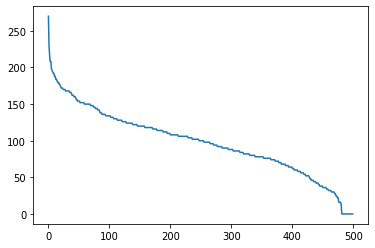

In [22]:
"""
Game 1 - No competition
---

The rules:
1. P players start with $100 each
2. In a single turn, each player makes a random bet: heads or tails
3. A coin is flipped. Players make or lose $1 depending if their bet matches the outcome of the coin flip
  - Note: the game is not zero-sum and players do not bet against each other. 
  - For example, all players can make $1 in a single turn
4. If players lose all their money, they are no longer allowed to bet
5. After N turns, the players are ranked by winnings
"""

import random
import matplotlib.pyplot as plt


def random_outcome():
    return random.choice(['H', 'T'])


class Player:
    def __init__(self, id):
        self.id = id
        self.bankroll = 100
        self.record = []

    def guess(self):
        return random_outcome()

    def process_turn_outcome(self, winFlag):
        """ winFlag: 1 (win) or 0 (loss) """
        self.record.append(winFlag)
        self.bankroll += (1 if winFlag == 1 else -1)


def turn(players):
    guesses = { 
        player.id: player.guess() 
        for player in players.values() 
        if player.bankroll > 0 
    }
    coinFlipOutcome = random_outcome()
    for playerId, playerGuess in guesses.items():
        winFlag = 1 if playerGuess == coinFlipOutcome else 0
        players[playerId].process_turn_outcome(winFlag)


numPlayers = 500
numTurns = 2000
players = { playerId: Player(id=playerId) for playerId in range(numPlayers) }
for i in range(numTurns):
    turn(players)
winnings = { playerId: player.bankroll for playerId, player in players.items() }
sortedWinnings = sorted(list(winnings.items()), key=lambda x: x[1], reverse=True)
plt.plot(sorted(winnings.values(), reverse=True))
